<a href="https://colab.research.google.com/github/SantiagoRidao/Proyectos_Data/blob/main/Analisis_de_precios_del_mercado_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO INTEGRADOR I- ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA

Precios-Mercado Central-Bs As-Arg-2017-2018-

El dataset podran ser descargado del siguiente enlace de drive. https://drive.google.com/file/d/1DgBBPk1ttFpEbpAPI30cgX8fps5zd45v/view?usp=share_link





Ridao, Santiago, 31253267




Redactar en formato resumen la problematica planteado e interes en el análisis del dataset elegido, el impacto que puede llevar a futuro analizar o cruzar información sobre dichas variables ,y cual sería a priori, el modelo a resulado que usted quisiera encontrar en funciones de determinadas condiciones. Esto deberá ser detallado en forma breve a modo de introducción

**Se eligió el dataset de “Precios mayoristas de frutas y hortalizas del Mercado Central de Buenos Aires” con el fin de analizar los datos incluidos en el mismo. Poder hacer variados reconocimientos de Clases. Y en base a datos preexistentes (datos reales del pasado) hacer predicciones de cómo serán los precios futuros (USD / Kg) de algunas frutas y hortalizas.**

_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
##1- Ingrese el DATA SET

In [ ]:
# Importar librerías

from pandas import read_csv
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import numpy as np

In [ ]:
# Importar  drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importar archivo
# Enlace directo al archivo CSV de precios-mercadocentral.csv
url = "/content/precios-mercadocentral.csv"

# Cargar el dataset de precios-mercadocentral.csv en un DataFrame
datafruta = pd.read_csv(url, encoding='latin-1')


##2- Aplicar PROCESO de ANÁLISIS EXPLORATORIO DE LOS DATOS (Algunas funciones comúnes que puedes aplicar: .head .info .describe etc).

In [ ]:
#Realizar una visualización de los datos
datafruta.head()


,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares


In [ ]:
datafruta.tail()

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares
827,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallo,s/especificar,s/especificar,0.32,USD,Dolares


In [ ]:
#Tamaño del dataset
datafruta.shape

(828, 11)

In [ ]:
# Describir las columnas y tipos de datos que contiene
datafruta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais_id        828 non-null    int64  
 1   pais           828 non-null    object 
 2   mercado        828 non-null    object 
 3   año            828 non-null    int64  
 4   mes            828 non-null    object 
 5   producto       828 non-null    object 
 6   variedad       828 non-null    object 
 7   origen         828 non-null    object 
 8   precio_usd_kg  767 non-null    float64
 9   moneda_cod     828 non-null    object 
 10  moneda         828 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 71.3+ KB


In [ ]:
#Explorar las columnas
datafruta.columns

Index(['pais_id', 'pais', 'mercado', 'año', 'mes', 'producto', 'variedad',
       'origen', 'precio_usd_kg', 'moneda_cod', 'moneda'],
      dtype='object')

In [ ]:
# Normalizar convirtiendo todos los valores a minúsculas
#datafruta['producto'] = datafruta['producto'].str.lower()


In [ ]:
# Detectar datos nulos
nul=datafruta.isnull().sum()
print('los nulos son',nul)

los nulos son pais_id           0
pais              0
mercado           0
año               0
mes               0
producto          0
variedad          0
origen            0
precio_usd_kg    61
moneda_cod        0
moneda            0
dtype: int64


#Análisis univariado

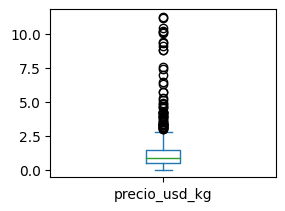

In [ ]:
# Lista de las columnas a graficar
columnas_numericas = ['precio_usd_kg']

# Graficar solo las columnas numéricas seleccionadas
datafruta[columnas_numericas].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
pyplot.show()


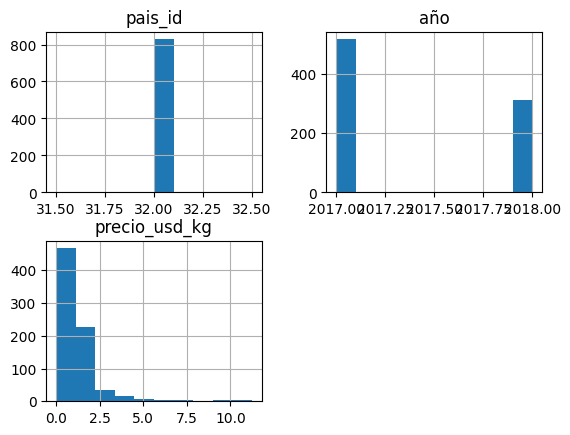

In [ ]:
datafruta.hist()
pyplot.show()

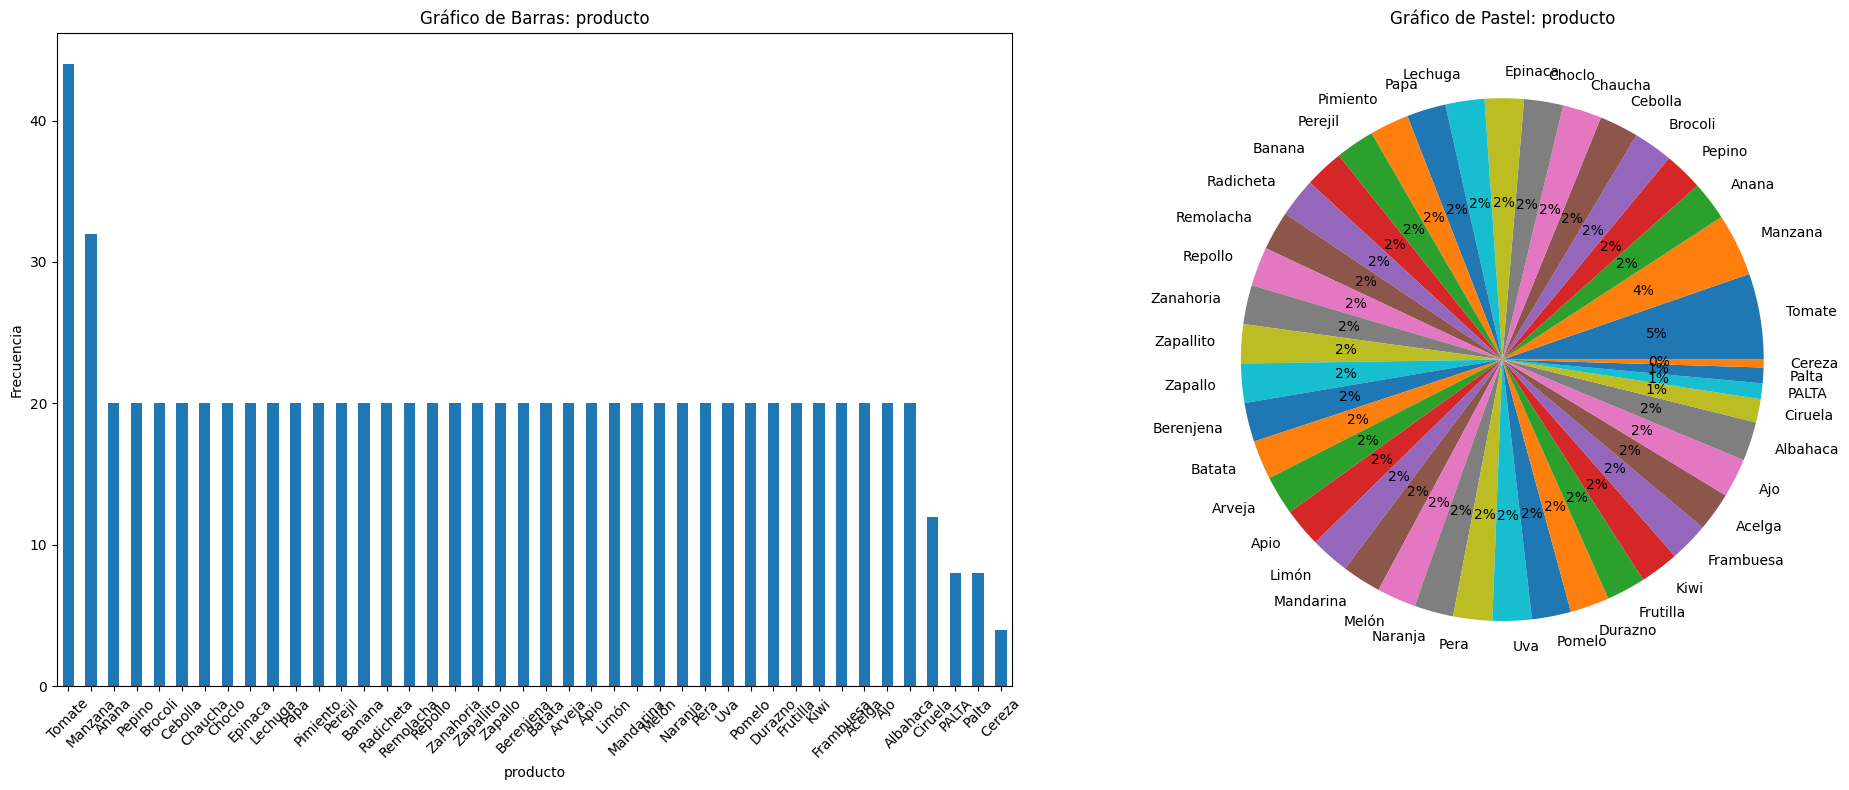

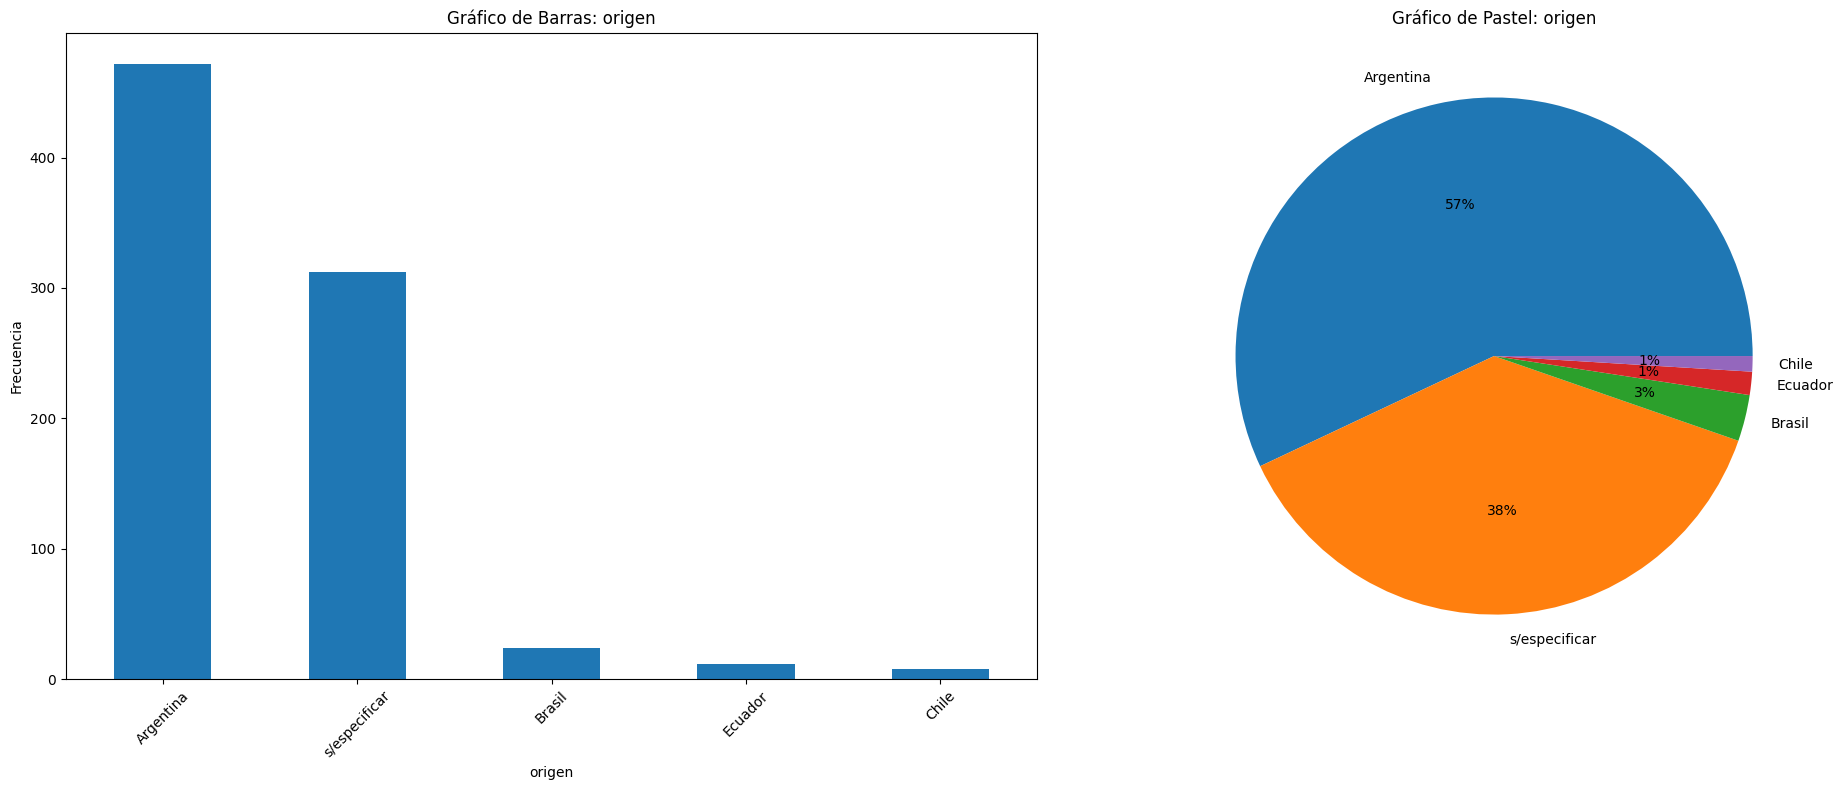

In [ ]:
#Para las columnas categóricas
columnas_a_analizar_categóricas = ["producto", "origen"]


for columna in columnas_a_analizar_categóricas:

    plt.figure(figsize=(20, 8))

    # Gráfico de barras
    plt.subplot(1, 2, 1)
    datafruta[columna].value_counts().plot(kind='bar')
    plt.title(f'Gráfico de Barras: {columna}')
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

    # Gráfico de pastel
    plt.subplot(1, 2, 2)
    datafruta[columna].value_counts().plot(kind='pie', autopct='%1.f%%')
    plt.title(f'Gráfico de Pastel: {columna}')
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

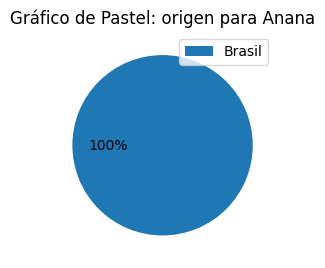

<Figure size 640x480 with 0 Axes>

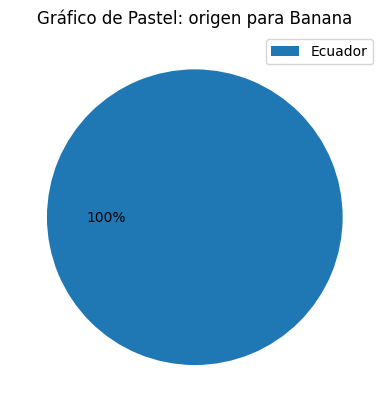

<Figure size 640x480 with 0 Axes>

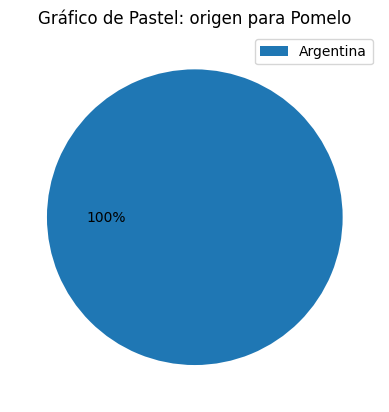

<Figure size 640x480 with 0 Axes>

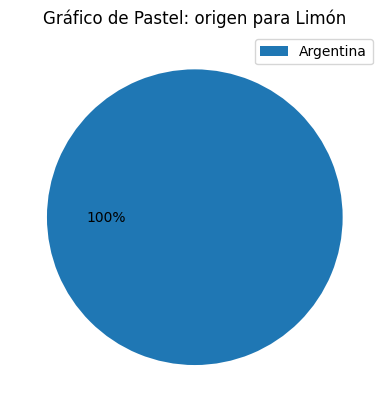

<Figure size 640x480 with 0 Axes>

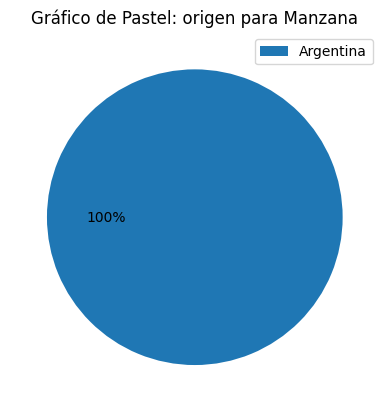

<Figure size 640x480 with 0 Axes>

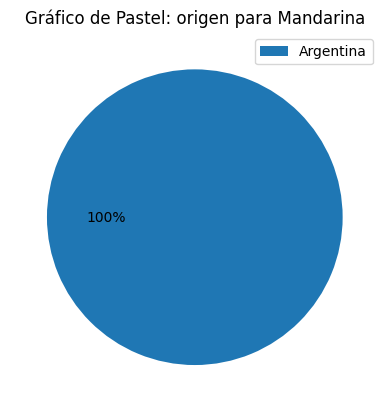

<Figure size 640x480 with 0 Axes>

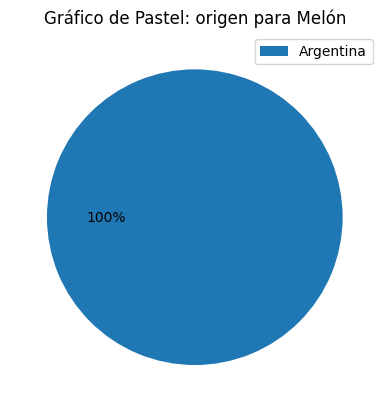

<Figure size 640x480 with 0 Axes>

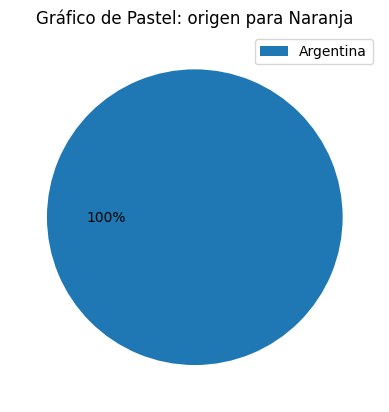

<Figure size 640x480 with 0 Axes>

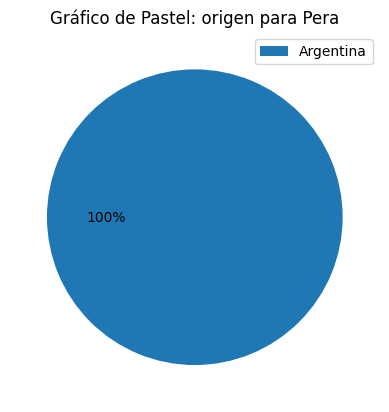

<Figure size 640x480 with 0 Axes>

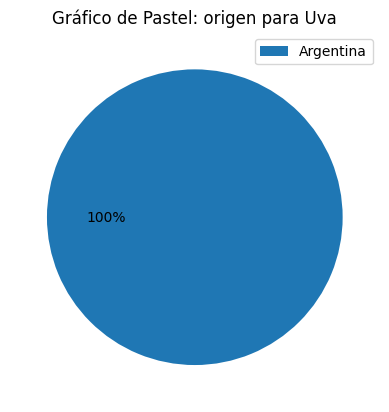

<Figure size 640x480 with 0 Axes>

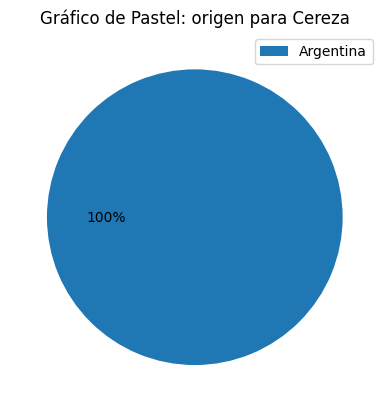

<Figure size 640x480 with 0 Axes>

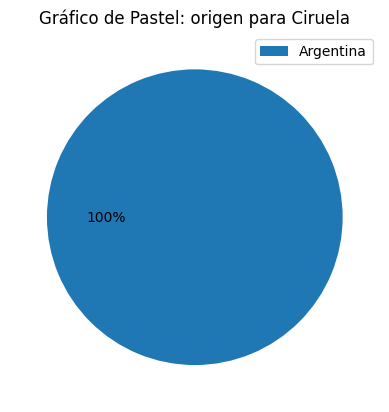

<Figure size 640x480 with 0 Axes>

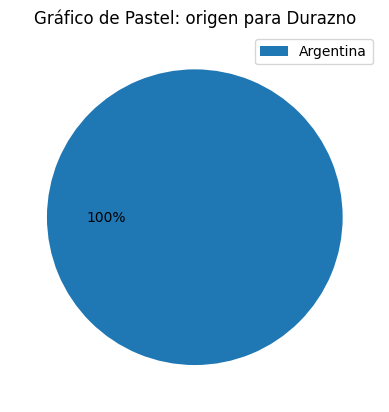

<Figure size 640x480 with 0 Axes>

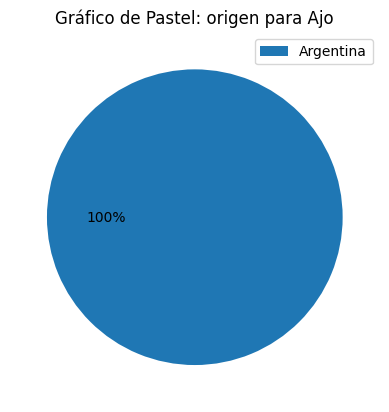

<Figure size 640x480 with 0 Axes>

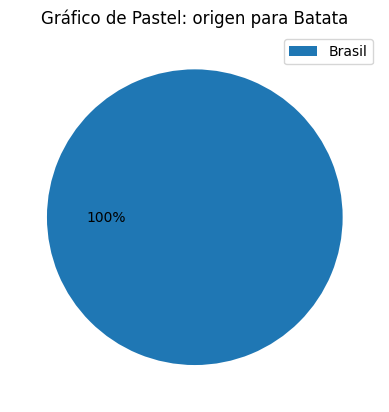

<Figure size 640x480 with 0 Axes>

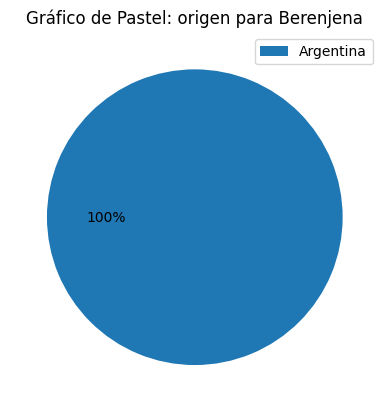

<Figure size 640x480 with 0 Axes>

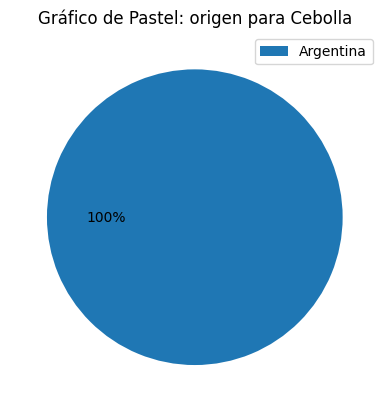

<Figure size 640x480 with 0 Axes>

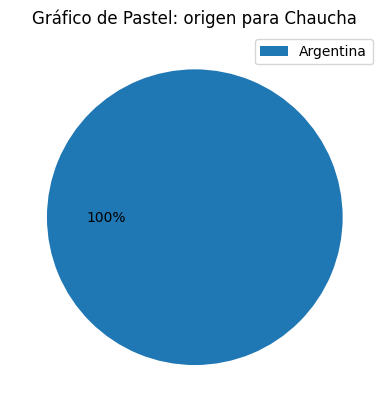

<Figure size 640x480 with 0 Axes>

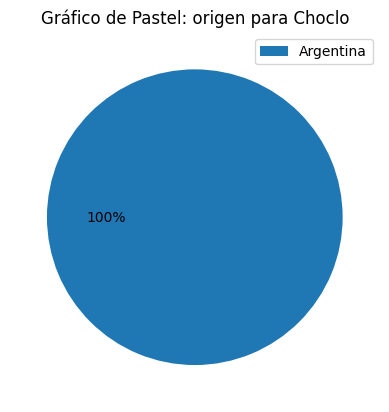

<Figure size 640x480 with 0 Axes>

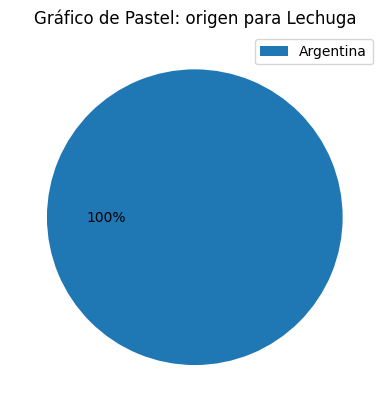

<Figure size 640x480 with 0 Axes>

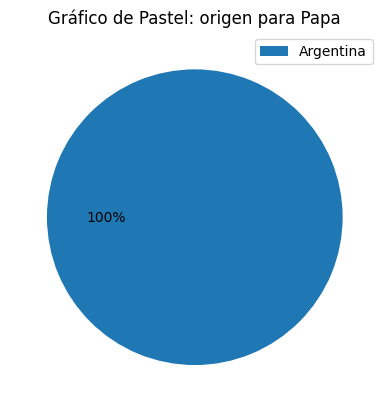

<Figure size 640x480 with 0 Axes>

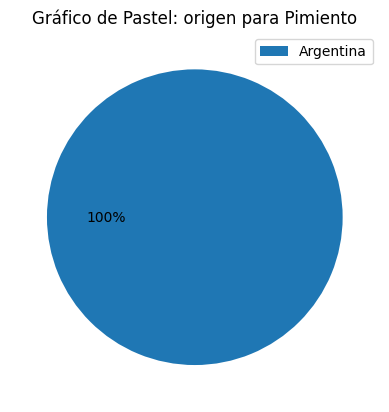

<Figure size 640x480 with 0 Axes>

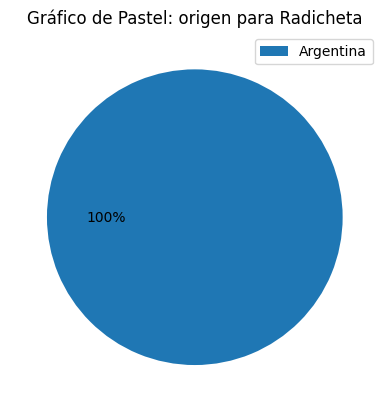

<Figure size 640x480 with 0 Axes>

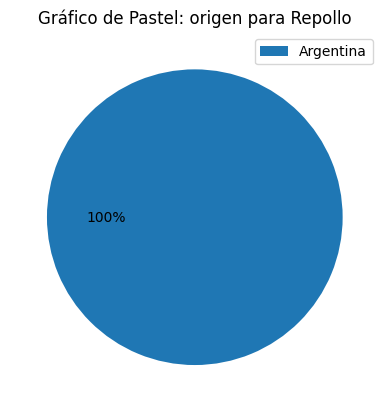

<Figure size 640x480 with 0 Axes>

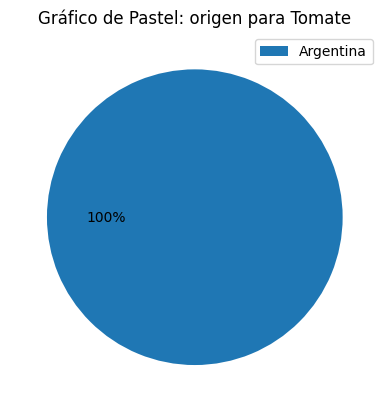

<Figure size 640x480 with 0 Axes>

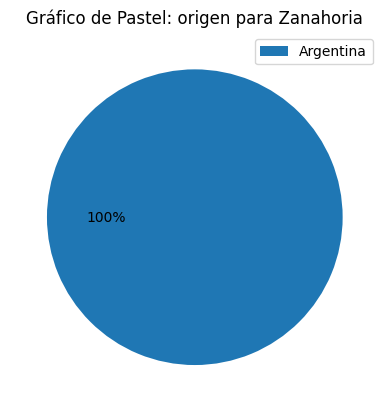

<Figure size 640x480 with 0 Axes>

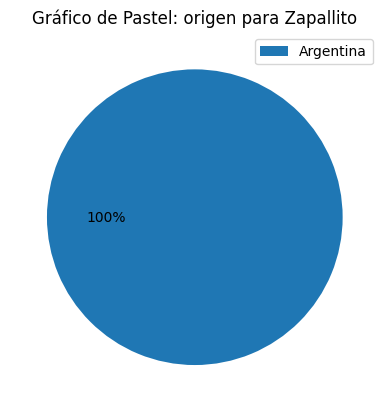

<Figure size 640x480 with 0 Axes>

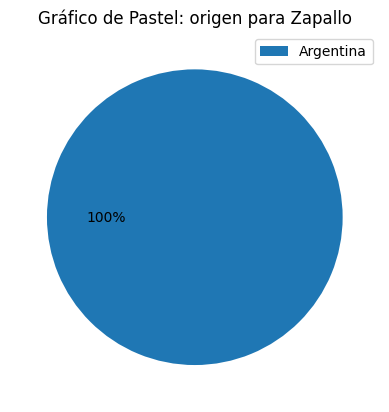

<Figure size 640x480 with 0 Axes>

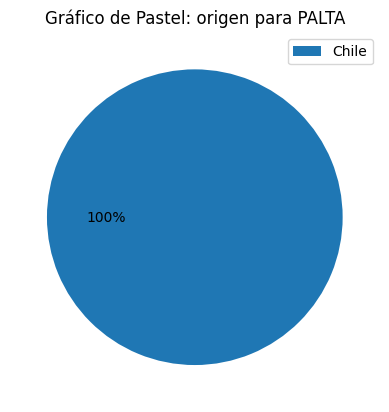

<Figure size 640x480 with 0 Axes>

In [ ]:
# Gráfica de torta para variedades por producto

columnas_a_analizar_categoricas = ["producto", "variedad"]

#for columna in columnas_a_analizar_categoricas:

   # Gráfico de pastel por producto con sus variedades excluyendo las que únicamente consignan "s/especificar"
plt.subplot(1, 2, 2)
for producto in datafruta["producto"].unique():
        subset = datafruta[(datafruta["producto"] == producto) & (datafruta["variedad"] != 's/especificar')]
        if not subset.empty:
            subset[columna].value_counts().plot(kind='pie', autopct='%1.f%%', labels=None)
            plt.title(f'Gráfico de Pastel: {columna} para {producto}')
            plt.ylabel("")
            plt.legend(subset[columna].unique(), loc='upper right')
            plt.show()
            plt.tight_layout()
            plt.show()

#Análisis de correlación

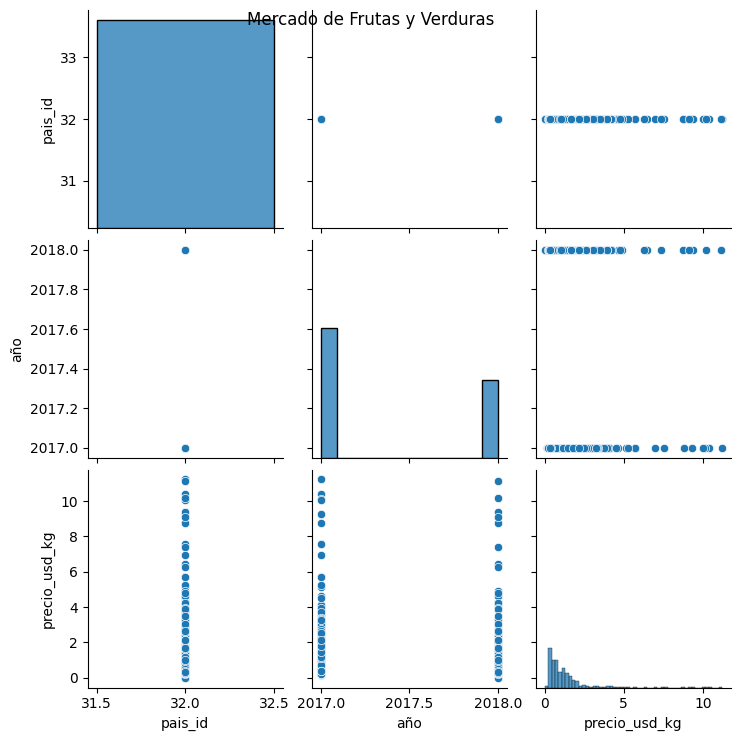

In [ ]:
import seaborn as sns
sns.pairplot(datafruta)
plt.suptitle("Mercado de Frutas y Verduras")
plt.show()

#Gráfica de correlación

##3- Aplicar PROCESO DE LIMPIEZA

In [ ]:
#limpio los valores nulos
datafruta.isnull().sum()
datafruta=datafruta.dropna()

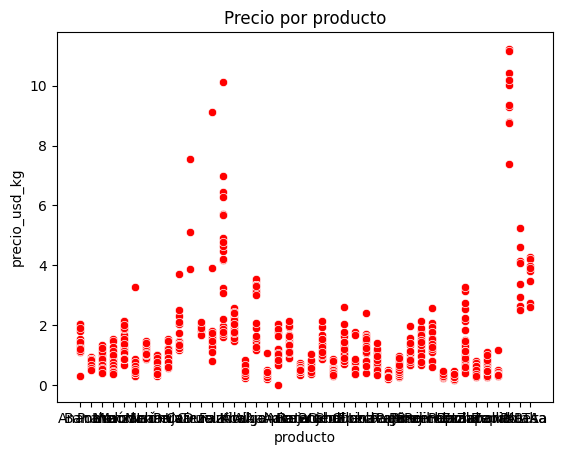

In [ ]:
 #Un primer grafico de puntos (usando seaborn)
sns.scatterplot(x=datafruta['producto'], y=datafruta['precio_usd_kg'], color='red')

plt.title("Precio por producto")
plt.show()

In [ ]:
# elimino las columnas que no influyen en el analisis por ahora. Y cambio un nombre que no me gusta
datafruta=datafruta.drop(labels='moneda_cod',axis=1)
datafruta=datafruta.drop(labels='moneda',axis=1)
datafruta=datafruta.drop(labels='pais_id',axis=1)
datafruta=datafruta.drop(labels='mercado',axis=1)
datafruta=datafruta.drop(labels='pais',axis=1)
datafruta=datafruta.rename({"precio_usd_kg":"preciokg"},axis=1)


In [ ]:
# nesesito los meses enumerados para trabajar con ellos.
# Primero enumero los meses
meses = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

# Aplicar la transformación a la columna 'mes' en el DataFrame
datafruta['mes'] = datafruta['mes'].str.lower()   # le bajo las mayusculas minuscula.
datafruta['mes'] = datafruta['mes'].map(meses) #hago el mapeo



In [ ]:
datafruta['año'] = datafruta['año'].astype(float) # paso la columna a float para poder usarla
datafruta['mes'] = (datafruta['año'] - datafruta['año'].min()) * 12 + datafruta['mes']# escribo los meses del 1 al 20

In [ ]:

# Codigo para unir las variedades y promedira el precio. No hacia falta hacerlo y no da bien para los precios promediados como el tomate y la manzana.
# Como la regresion la hacemos con la papa, es lo mismo.
df_precio_promedio = datafruta.groupby(['producto', 'mes'])['preciokg'].mean().reset_index()

# Renombra la columna 'precio' a 'precio_promedio'
df_precio_promedio.rename(columns={'preciokg': 'precio_promedio'}, inplace=True)

# Fusiona el DataFrame original con el DataFrame de precio promedio utilizando 'producto' y 'mes' como claves de fusión
datafruta =datafruta.merge(df_precio_promedio, on=['producto', 'mes'], how='left')
datafruta.head()

,año,mes,producto,variedad,origen,preciokg,precio_promedio
0,2017.0,1.0,Anana,Perola,Brasil,1.22,1.22
1,2017.0,1.0,Banana,Cavdich,Ecuador,0.53,0.53
2,2017.0,1.0,Pomelo,Star Ruby,Argentina,0.86,0.86
3,2017.0,1.0,Limón,Eureka,Argentina,1.52,1.52
4,2017.0,1.0,Manzana,Granny Smith,Argentina,1.84,1.65


In [ ]:
dfcorr =datafruta.drop(columns=['variedad'])
dfcorr =datafruta.drop(columns=['preciokg'])
dfcorr = dfcorr.drop_duplicates(subset=['producto', 'mes'], keep='first')
dfcorr.head()

,año,mes,producto,variedad,origen,precio_promedio
0,2017.0,1.0,Anana,Perola,Brasil,1.22
1,2017.0,1.0,Banana,Cavdich,Ecuador,0.53
2,2017.0,1.0,Pomelo,Star Ruby,Argentina,0.86
3,2017.0,1.0,Limón,Eureka,Argentina,1.52
4,2017.0,1.0,Manzana,Granny Smith,Argentina,1.65


In [ ]:
# Calculo la correlacion por producto entre las variables mes y preciokg. Selecciono las que se correlacionan por arriba de 0.5 en modulo
correlaciones_totales = []
correlacionesbuenas = [] #mayores a 0.5 en modulo

productos = dfcorr['producto'].unique()

for producto in productos:                         # calculo la correlacion para los procuctos
    producto_df = dfcorr[dfcorr['producto'] == producto]
    correlacion = producto_df['mes'].corr(producto_df['precio_promedio'])
    correlaciones_totales.append((producto, correlacion))


    if abs(correlacion) > 0.5:                     # me quedo con los productos con mayor correlacion en valor absoluto
        correlacionesbuenas.append((producto, correlacion))


print("Correlaciones Totales:")
for producto, correlacion in correlaciones_totales:
    print(f"Producto: {producto}, Correlación: {correlacion:.2f}")

# correlaciones mayores a 0.5 en modulo
print("Correlaciones Mayores a 0.5:")
for producto, correlacion in correlacionesbuenas:
    print(f"Producto: {producto}, Correlación: {correlacion:.2f}")

Correlaciones Totales:
Producto: Anana, Correlación: 0.09
Producto: Banana, Correlación: -0.31
Producto: Pomelo, Correlación: -0.18
Producto: Limón, Correlación: -0.55
Producto: Manzana, Correlación: -0.51
Producto: Mandarina, Correlación: 0.25
Producto: Melón, Correlación: 0.61
Producto: Naranja, Correlación: 0.52
Producto: Pera, Correlación: 0.17
Producto: Uva, Correlación: 0.09
Producto: Cereza, Correlación: 0.98
Producto: Ciruela, Correlación: 0.41
Producto: Durazno, Correlación: 0.31
Producto: Frutilla, Correlación: 0.02
Producto: Kiwi, Correlación: 0.45
Producto: Acelga, Correlación: -0.20
Producto: Ajo, Correlación: -0.92
Producto: Albahaca, Correlación: 0.17
Producto: Apio, Correlación: -0.53
Producto: Arveja, Correlación: 0.34
Producto: Batata, Correlación: -0.56
Producto: Berenjena, Correlación: 0.56
Producto: Brocoli, Correlación: -0.28
Producto: Cebolla, Correlación: -0.59
Producto: Chaucha, Correlación: 0.53
Producto: Choclo, Correlación: 0.53
Producto: Epinaca, Correlació

##4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.

In [ ]:
# seguramente se repiten librerias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error



# Filtro los datos del producto que elijo con buena correlacion
_df = dfcorr[dfcorr['producto'] == 'Papa']


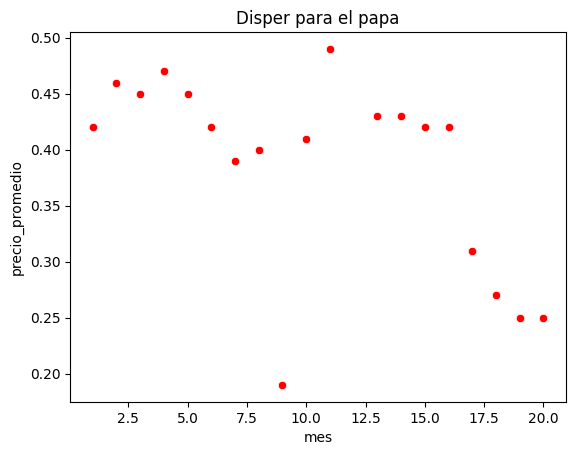

In [ ]:
# miro los datos con un grafico para ver la tendencia a valores atipicos
sns.scatterplot(x=_df['mes'], y=datafruta['precio_promedio'], color='red')

plt.title("Disper para el papa")
plt.show()

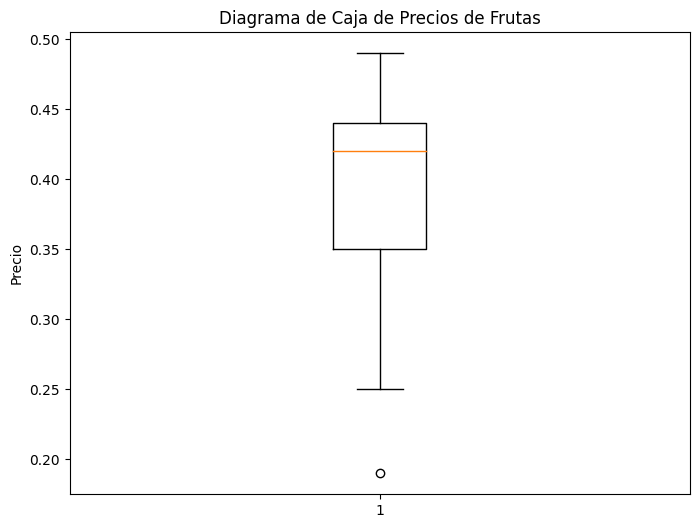

In [ ]:
# grafico de caja
plt.figure(figsize=(8, 6))  # Tamaño
plt.boxplot(_df['precio_promedio'])
plt.title('Diagrama de Caja de Precios de Frutas')
plt.ylabel('Precio')
plt.show()

In [ ]:
# Hay un valor atipico por debajo de la caja. Eliminarlo deberia mejorar la correlacion. Se ve claro en el grf de dispercion.
umbral_inferior = _df['precio_promedio'].quantile(0.25) - 1.5 * (_df['precio_promedio'].quantile(0.75) - _df['precio_promedio'].quantile(0.25))

# Elimino el valor atipoco. Esto debe mejorar la corr
_df = _df[_df['precio_promedio'] > umbral_inferior]

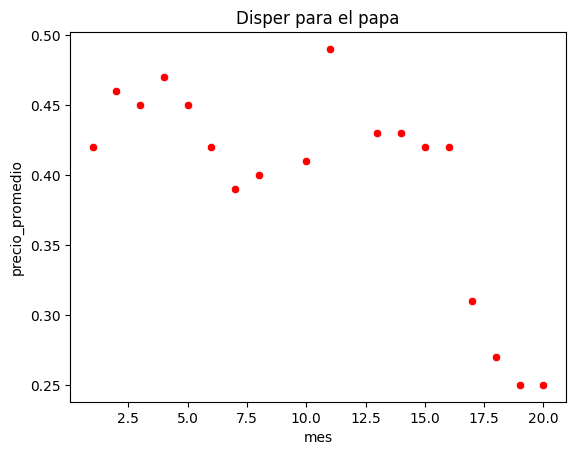

In [ ]:
# miro los datos con un grafico para ver la tendencia a valores atipicos
sns.scatterplot(x=_df['mes'], y=datafruta['precio_promedio'], color='red')

plt.title("Disper para el papa")
plt.show()

In [ ]:
# creo el modelo de regresion lineal
regresion_lineal = LinearRegression()

# Hago el split en entrenamiento y prueba
X = _df[['mes']].values.reshape(-1,1)
y = _df['precio_promedio'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entreno el modelo
regresion_lineal.fit(X_train, y_train)

y_train_pred = regresion_lineal.predict(X_train) #prediccion para los datos de entrenamiento. para calcular que tan bien ajusta el modelo
y_test_pred = regresion_lineal.predict(X_test)   #pred para los datos de prueba. para ver que tan bien predice el modelo



##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

Para la evaluacion del modelo de regresion se calcula el error cuadratico medio. La eleccion radica en que se pretende predecir el precio de la fruta con la mayor presicion posible, por lo que es conveniente penalizar los errores mas grandes. Esto es lo que hace el mse.

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred) #error cuadratico medio en el entrenamiento
mse_test = mean_squared_error(y_test, y_test_pred)    # ecm en el lote de prueba

print(f"MSE en el conjunto de entrenamiento: {mse_train}")
print(f"MSE en el conjunto de prueba: {mse_test}")



correlacion, valor_p = stats.pearsonr(_df['mes'], _df['precio_promedio']) #mido la corr y la significancia.
print(f"Correlación entre 'mes' y 'precio' para {'Papa'}: {correlacion:.2f}")
print(f"Valor p para la correlación: {valor_p:.4f}")


MSE en el conjunto de entrenamiento: 0.0028552886846746487
MSE en el conjunto de prueba: 0.002371891245633882
Correlación entre 'mes' y 'precio' para Papa: -0.72
Valor p para la correlación: 0.0008


Como se muestra, los errores tanto en entrenamiento como en la predicción son bajos. Esto es in indicio que el modelo ajusta bien los datos y hace buenas predicciones. El hecho que sean similares los errores también indica que no hay sobreajuste. Por otra parte, la correlación aumento después de sacar el valor atípico, lo que favoreció en gran medida al modelo. El índice de significancia es muy bajo, esto indica que la correlación es real y no meramente estadística. Esta es una consideración importante al trabajar con pocos datos.

In [ ]:
mes_prediccion = 21  # Mes para la predicción
precio_predicho = regresion_lineal.predict([[mes_prediccion]])
print(f"Precio predicho para el mes {mes_prediccion}: {precio_predicho[0]}")

Precio predicho para el mes 21: 0.2946816114359974


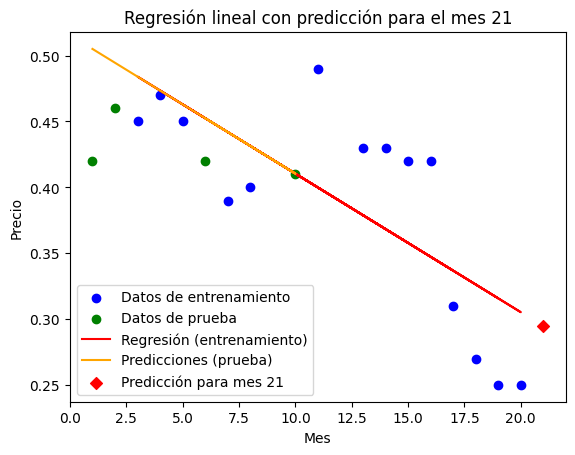

In [ ]:
#plot de la regrasion con los datos reales y predichos

plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')
plt.plot(X_train, y_train_pred, color='red', label='Regresión (entrenamiento)')
plt.plot(X_test, y_test_pred, color='orange', label='Predicciones (prueba)')
plt.scatter(mes_prediccion, precio_predicho, color='red', marker='D', label=f'Predicción para mes {mes_prediccion}')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.title('Regresión lineal con predicción para el mes 21')
plt.legend()
plt.show()

In [ ]:
# Filtro los datos del producto que elijo con buena correlacion
_df = dfcorr[dfcorr['producto'] == 'Papa']
# Hago el split en entrenamiento y prueba
X = _df[['mes']].values.reshape(-1,1)
y = _df['precio_promedio'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Realizar validación cruzada k-fold con k=3. Tengo que hacer el split de nuevo sin el random_state
scores = cross_val_score(regresion_lineal, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

# Calcula el MSE promedio a través de la validación cruzada (ten en cuenta que los valores son negativos)
mse_promedio = -scores.mean()

print(f"MSE promedio a través de validación cruzada: {mse_promedio}")

MSE promedio a través de validación cruzada: 0.0023335115053288846


Se realizo el cálculo del error a partir de la validación cruzada, en este caso k-fold. Como se muestra, el error también da bastante bajo. Siendo este método de estimación de error algo más confiable que el utilizado sobre los datos, y considerando que todos los errores son bajos, se puede concluir que el modelo ajusta bien los datos y puede generalizar a nuevos datos de forma eficiente.


#Ahora para Regresion Logistica


In [ ]:
df_tomate = datafruta[datafruta['producto'] == 'Tomate']
df_tomate.head()

,año,mes,producto,variedad,origen,preciokg,precio_promedio
36,2017.0,1.0,Tomate,Cherry,Argentina,1.02,0.703333
37,2017.0,1.0,Tomate,Perita,Argentina,0.55,0.703333
38,2017.0,1.0,Tomate,Redondo,Argentina,0.54,0.703333
79,2017.0,2.0,Tomate,Cherry,Argentina,1.85,1.076667
80,2017.0,2.0,Tomate,Perita,Argentina,0.67,1.076667


In [ ]:
#hay 3 variedades de tomate. Me quedo con las dos que tienen mayor diferencia en el precio
df_tomate_cherry_redondo = df_tomate[df_tomate['variedad'].isin(['Cherry', 'Redondo'])]
df_tomate_cherry_redondo['variedad'] = df_tomate_cherry_redondo['variedad'].map({'Cherry': 0, 'Redondo': 1})
df_tomate_cherry_redondo = df_tomate_cherry_redondo.drop('precio_promedio', axis=1)
#df_tomate_cherry_redondo

<ipython-input-273-7ce1066feb78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomate_cherry_redondo['variedad'] = df_tomate_cherry_redondo['variedad'].map({'Cherry': 0, 'Redondo': 1})


In [ ]:
from sklearn.preprocessing import StandardScaler
# defino las variables y escalo los datos.

X = df_tomate_cherry_redondo[['preciokg']]  # Las características (precio en este caso)
y = df_tomate_cherry_redondo['variedad']  # La variable objetivo (variedad en este caso)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35) #separo los datos en test y train

scaler = StandardScaler() # reescaleo os datos para un mejor procesamiento
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)



# Crear el modelo y lo entreno
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

Para la reg logistica la metrica por la que se opto fue la precision. La razon radica en que la intencion es saber que tan bien el modelo selecciona correctamente las variedades considerando que no todas las variedades son igualmente importantes

In [ ]:
# Hacemos las predicciones con el conjunto de test
y_pred = modelo.predict(X_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred) #calculo la precision del modelo.
print(f'Precisión del modelo en el conjunto de prueba: {accuracy}')

[0 1 0 1 0]
Precisión del modelo en el conjunto de prueba: 0.8


In [ ]:
# Realizar validación cruzada k-fold con k=3. Tengo que hacer el split de nuevo sin el random_state
scores = cross_val_score(modelo, X_train, y_train, cv=3, scoring='accuracy')

# Calcula el MSE promedio a través de la validación cruzada (ten en cuenta que los valores son negativos)
precision_promedio = scores.mean()

print(f"Precision promedio a través de validación cruzada: {precision_promedio}")

Precision promedio a través de validación cruzada: 0.8111111111111112


Como se muestra, la precision en la clasificacion del modeo ronda el 80 %.

In [ ]:
# Para hacer predicciones hago una dicc con valores de tomate
data = {'preciokg': [2, 0.5, 2.8, 0.92, 1.67, 1.01, 3, 2]}

nuevos_tomates = pd.DataFrame(data)

In [ ]:
X_nuevos_tomates = scaler.transform(nuevos_tomates[['preciokg']]) # escaleo los datos.
#X_nuevos_tomates = nuevos_tomates[['preciokg']]
predicciones = modelo.predict(X_nuevos_tomates)
probabilidades = modelo.predict_proba(X_nuevos_tomates)

variedades_predichas = ['Cherry' if pred == 0 else 'Redondo' for pred in predicciones]

# Agrega las predicciones al DataFrame 'nuevos_tomates'.
nuevos_tomates['variedad_predicha'] = variedades_predichas
print(variedades_predichas)

['Cherry', 'Redondo', 'Cherry', 'Redondo', 'Cherry', 'Redondo', 'Cherry', 'Cherry']


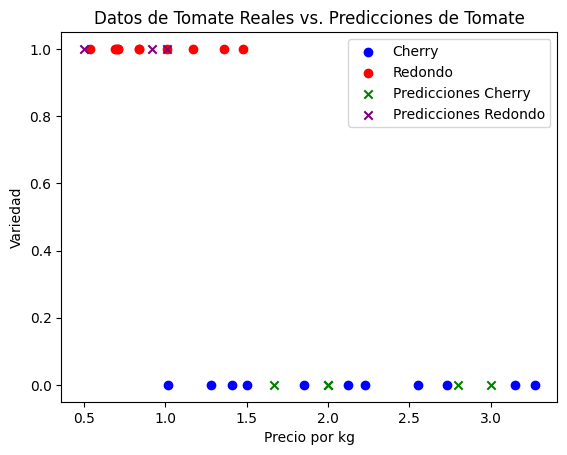

In [ ]:
# Valores reales. A este graff le falta la linea de desicion. No se como se agrega
plt.scatter(df_tomate_cherry_redondo[df_tomate_cherry_redondo['variedad'] == 0]['preciokg'], [0] * sum(df_tomate_cherry_redondo['variedad'] == 0), color='blue', marker='o', label='Cherry')
plt.scatter(df_tomate_cherry_redondo[df_tomate_cherry_redondo['variedad'] == 1]['preciokg'], [1] * sum(df_tomate_cherry_redondo['variedad'] == 1), color='red', marker='o', label='Redondo')

# Predic para los valores inventados
plt.scatter(nuevos_tomates[nuevos_tomates['variedad_predicha'] == 'Cherry']['preciokg'], [0] * sum(nuevos_tomates['variedad_predicha'] == 'Cherry'), color='green', marker='x', label='Predicciones Cherry')
plt.scatter(nuevos_tomates[nuevos_tomates['variedad_predicha'] == 'Redondo']['preciokg'], [1] * sum(nuevos_tomates['variedad_predicha'] == 'Redondo'), color='purple', marker='x', label='Predicciones Redondo')

plt.xlabel('Precio por kg')
plt.ylabel('Variedad')
plt.legend()
plt.title('Datos de Tomate Reales vs. Predicciones de Tomate')
plt.show()

##6- Sacar una conclusión en función de los resultados, errores, y predicciones.

# Los resultados de este estudio se encuentran detallados en cada gráfico y debajo de cada error a lo largo del trabajo.

##7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


En esta seccion se probo aplicar un modelo knn al dataframe de tomates y sus 3 variedades. En este caso, el precio no llega a ser una variable significativa para poder distinguir entre las variedades "redondo" y "perita". Dado que los precios son muy similares en las variedades mencionadas, un modelo como knn, que evalua primeros vecinos, no llega a aprender los suficiente como para poder distinguir una de la otra. Se deberia incluir una columna con caracteristicas particulares de cada variedad.

In [ ]:
df_tomate = datafruta[datafruta['producto'] == 'Tomate']
df_tomate.head()

,año,mes,producto,variedad,origen,preciokg,precio_promedio
36,2017.0,1.0,Tomate,Cherry,Argentina,1.02,0.703333
37,2017.0,1.0,Tomate,Perita,Argentina,0.55,0.703333
38,2017.0,1.0,Tomate,Redondo,Argentina,0.54,0.703333
79,2017.0,2.0,Tomate,Cherry,Argentina,1.85,1.076667
80,2017.0,2.0,Tomate,Perita,Argentina,0.67,1.076667


In [ ]:
#hay 3 variedades de tomate.
df_tomate_cherry_redondo_perita = df_tomate[df_tomate['variedad'].isin(['Cherry', 'Redondo', "Perita"])]
df_tomate_cherry_redondo_perita['variedad'] = df_tomate_cherry_redondo_perita['variedad'].map({'Cherry': 0, 'Redondo': 1, "Perita": 2})
#df_tomate_cherry_redondo_perita = df_tomate_cherry_redondo_perita.drop('precio_promedio', axis=1)
#df_tomate_cherry_redondo

<ipython-input-281-acef18899d79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomate_cherry_redondo_perita['variedad'] = df_tomate_cherry_redondo_perita['variedad'].map({'Cherry': 0, 'Redondo': 1, "Perita": 2})


In [ ]:
df_tomate_cherry_redondo_perita = df_tomate_cherry_redondo_perita.drop('producto', axis=1)
df_tomate_cherry_redondo_perita = df_tomate_cherry_redondo_perita.drop('origen', axis=1)
df_tomate_cherry_redondo_perita = df_tomate_cherry_redondo_perita.drop('precio_promedio', axis=1)

Precisión de k-NN: 0.29


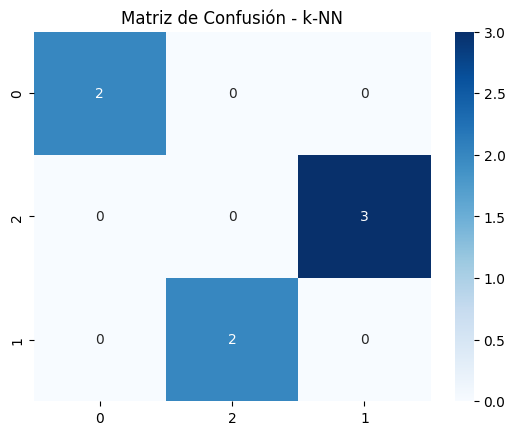

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_tomate_cherry_redondo_perita.drop('variedad', axis=1)  # Características
y = df_tomate_cherry_redondo_perita['variedad']  # Etiquetas (variedades)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


# Crear y entrenar el modelo k-NN
modelo_knn = KNeighborsClassifier(n_neighbors=1)
modelo_knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = modelo_knn.predict(X_test)

# Calcular la precisión del modelo k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Precisión de k-NN: {accuracy_knn:.2f}")

confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Visualizar la matriz de confusión para k-NN
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues', xticklabels=df_tomate_cherry_redondo_perita['variedad'].unique(), yticklabels=df_tomate_cherry_redondo_perita['variedad'].unique())
plt.title('Matriz de Confusión - k-NN')
plt.show()


Como muestra la matriz de confucion, el modelo en general hace buenas predicciones para la variedad "cherry" pero les es imposible distinguir entre variedades con precios similares, como es de esperar.

In [ ]:
#hay 3 variedades de tomate. Me quedo con las dos que tienen mayor diferencia en el precio
df_tomate_cherry_perita = df_tomate[df_tomate['variedad'].isin(['Cherry', 'Perita'])]
df_tomate_cherry_perita['variedad'] = df_tomate_cherry_perita['variedad'].map({'Cherry': 1, 'Perita': 0})
df_tomate_cherry_perita = df_tomate_cherry_perita.drop('precio_promedio', axis=1)
df_tomate_cherry_perita = df_tomate_cherry_perita.drop('año', axis=1)
df_tomate_cherry_perita = df_tomate_cherry_perita.drop('mes', axis=1)
df_tomate_cherry_perita = df_tomate_cherry_perita.drop('producto', axis=1)
df_tomate_cherry_perita = df_tomate_cherry_perita.drop("origen", axis=1)

<ipython-input-284-8cd64a50b7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomate_cherry_perita['variedad'] = df_tomate_cherry_perita['variedad'].map({'Cherry': 1, 'Perita': 0})


Precisión de k-NN: 0.80


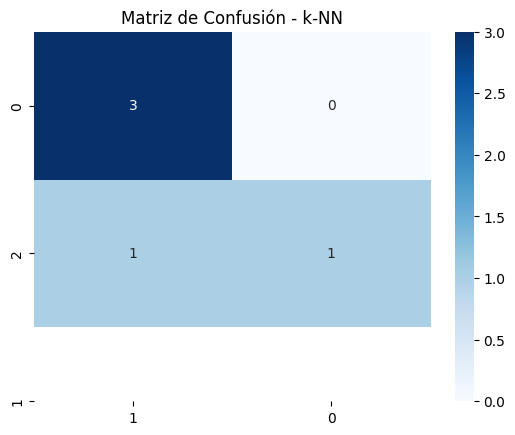

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_tomate_cherry_perita.drop('variedad', axis=1)  # Características
y = df_tomate_cherry_perita['variedad']  # Etiquetas (variedades)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn= scaler.transform(X_test_knn)


# Crear y entrenar el modelo k-NN
modelo_knn = KNeighborsClassifier(n_neighbors=1)
modelo_knn.fit(X_train_knn, y_train_knn)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = modelo_knn.predict(X_test_knn)

# Calcular la precisión del modelo k-NN
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"Precisión de k-NN: {accuracy_knn:.2f}")

confusion_knn = confusion_matrix(y_test_knn, y_pred_knn)

# Visualizar la matriz de confusión para k-NN
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues', xticklabels=df_tomate_cherry_perita['variedad'].unique(), yticklabels=df_tomate_cherry_redondo_perita['variedad'].unique())
plt.title('Matriz de Confusión - k-NN')
plt.show()


In [ ]:
# Realizar validación cruzada k-fold con k=3. Tengo que hacer el split de nuevo sin el random_state
scores = cross_val_score(modelo_knn, X_train_knn, y_train_knn, cv=5, scoring='accuracy')

# Calcula el MSE promedio a través de la validación cruzada (ten en cuenta que los valores son negativos)
precision_promedio = scores.mean()

print(f" promedio a través de validación cruzada: {precision_promedio}")

 promedio a través de validación cruzada: 0.8166666666666667


In [ ]:
data_knn = {'preciokg': [2, 0.5, 2.8, 0.92, 1.67, 1.01, 0.01, 2]}

nuevos_tomates_arbol = pd.DataFrame(data_knn)

In [ ]:
X_nuevos_tomates = scaler.transform(nuevos_tomates_arbol[['preciokg']]) # escaleo los datos.
#X_nuevos_tomates = nuevos_tomates[['preciokg']]
predicciones = modelo.predict(X_nuevos_tomates)
probabilidades = modelo.predict_proba(X_nuevos_tomates)

variedades_predichas = ['Cherry' if pred == 0 else 'Redondo' for pred in predicciones]

# Agrega las predicciones al DataFrame 'nuevos_tomates'.
nuevos_tomates_arbol['variedad_predicha'] = variedades_predichas
print(variedades_predichas)

['Cherry', 'Redondo', 'Cherry', 'Redondo', 'Redondo', 'Redondo', 'Redondo', 'Cherry']


Para este caso, en el que los precios se diferencian bien, la pecision aumenta y las predicciones son buenas.

##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.

Para obtener mejores datos en este dataset y mejorar las predicciones, es fundamental considerar varios enfoques:


1.   Calidad de los datos: Asegurar que los datos estén limpios y libres de errores es esencial. Esto incluye la detección y corrección de valores atípicos, datos faltantes y errores de entrada. La calidad de los datos es fundamental para cualquier análisis o predicción confiable.

2.  Incorporar más características: Dependiendo de la naturaleza de su predicción, considerar la inclusión de características adicionales podría mejorar significativamente el modelo. Por ejemplo, características económicas y climáticas podrían ser relevantes en el contexto de precios de productos agrícolas.

3.  Normalización de monedas: Asegurarse de que todas las cifras monetarias estén en una única moneda y que se aplique una tasa de cambio apropiada a lo largo del tiempo, si es necesario. Esto ayudará a mantener la coherencia en la comparación de precios a lo largo de diferentes períodos.

4.  Análisis de estacionalidad: Evaluar la estacionalidad en los datos podría ayudar a identificar patrones estacionales en los precios. Esto podría ser útil para predecir cuándo los precios tienden a subir o bajar en función de la época del año.

5.  Tendencias a largo plazo: Evaluar las tendencias a largo plazo en los precios de los productos y su relación con factores macroeconómicos y políticos. Esto podría ayudar a prever cambios estructurales en los precios.

6.  Segmentación de datos: Dividir los datos en segmentos más pequeños basados en diferentes criterios, como país, mercado, variedad de producto, etc., y realizar análisis y predicciones específicos para cada segmento. Esto puede mejorar la precisión de las predicciones al considerar las características únicas de cada segmento.

7.  Técnicas avanzadas de modelado: Experimentar con modelos más avanzados, como redes neuronales, series temporales y modelos de aprendizaje profundo, para capturar relaciones más complejas en los datos.

8.  Validación cruzada y métricas de evaluación: Utilizar técnicas de validación cruzada para evaluar la capacidad de generalización del modelo y seleccionar métricas adecuadas (por ejemplo, error cuadrático medio, coeficiente de determinación, etc.) para evaluar la calidad de las predicciones.

9.  Actualización continua: Los datos económicos y de mercado son inherentemente cambiantes. Por lo tanto, es importante mantener el dataset actualizado y continuar recopilando datos a medida que estén disponibles para mejorar la precisión de las predicciones.

Algunos tipos de información que podría considerar agregar son:

1.   Datos climáticos: Incorporar datos meteorológicos como temperaturas, precipitación, humedad, y condiciones climáticas específicas a nivel de región o área de producción. Estos datos son particularmente relevantes para productos agrícolas, ya que el clima influye en la oferta y demanda.

2.   Datos de cosecha: Información sobre la cantidad de producto cosechado, la calidad de la cosecha y la eficiencia de la producción. Esto puede ser crucial para comprender las fluctuaciones en los precios de los productos.

3.   Datos de cosecha: Información sobre la cantidad de producto cosechado, la calidad de la cosecha y la eficiencia de la producción. Esto puede ser crucial para comprender las fluctuaciones en los precios de los productos.

4.   Datos de eventos económicos y políticos: Seguir eventos económicos y políticos, como cambios en las políticas comerciales, acuerdos internacionales, tasas de interés, inflación, y otras variables económicas que pueden influir en los precios de los productos.

5.   Información de la cadena de suministro: Datos sobre la logística y la cadena de suministro, incluyendo costos de transporte, almacenamiento y distribución. Estos datos pueden ayudar a entender los márgenes de beneficio y los costos asociados con el producto.

6.   Índices de inflación: Seguir los índices de inflación a nivel local o regional puede proporcionar información importante sobre cómo los precios de los productos se ven afectados por cambios en el poder adquisitivo de la moneda.

7.   Datos de consumo y demanda: Información sobre los patrones de consumo de los productos en cuestión, como tendencias de consumo, preferencias del consumidor y demografía de los consumidores.

8.   Datos de competidores y mercado: Información sobre la competencia en el mercado, como la presencia y actividad de otros productores y vendedores de productos similares.

9.   Datos de precios en mercados internacionales: Si sus productos son exportados o importados, los datos de precios en mercados internacionales son valiosos para comprender las influencias globales en los precios.

10.   Datos de calidad y certificaciones: Información sobre la calidad del producto, certificaciones de origen, sellos de calidad, y otros aspectos que puedan afectar el valor de los productos en el mercado.

11.   Datos de redes sociales y opiniones de consumidores: La retroalimentación de los consumidores en redes sociales y foros en línea puede proporcionar información sobre la percepción del producto en el mercado y las tendencias emergentes.